## Let's look at the data!

In [1]:
import os,sys,time,random,math,time
import tarfile, zipfile

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from IPython.display import display, Image

from subprocess import check_output
datadir="./input/"
print(check_output(["ls", datadir]).decode("utf8"))

%matplotlib inline  


test.csv
test.csv.zip
test_data_all_features.csv
test_data_cats.csv
test_data_conts.csv
test_data_new.csv
test_data_orig_only.csv
test_data_validation_train_all_features.csv
test_data_validation_train_cats.csv
test_data_validation_train_conts.csv
test_data_validation_train_new.csv
test_data_validation_train_orig_only.csv
train.csv
train.csv.zip
train_data_all_features.csv
train_data_cats.csv
train_data_conts.csv
train_data_new.csv
train_data_orig_only.csv
train_data_validation_train_all_features.csv
train_data_validation_train_cats.csv
train_data_validation_train_conts.csv
train_data_validation_train_new.csv
train_data_validation_train_orig_only.csv



### Some base functions we use:

In [2]:
def loadData(datadir,filename):
    # Load the wholesale customers dataset
    #data = pd.read_csv(filename)
    data = ''
    print ("loading: "+datadir+filename)
    try:
        if zipfile.is_zipfile(datadir+filename):
            z = zipfile.ZipFile(datadir+filename)
            filename = z.open(filename[:-4])
        else:
            filename=datadir+filename
        data = pd.read_csv(filename, parse_dates=True)  
        print ("Dataset has {} samples with {} features each.".format(*data.shape))
    except Exception as e:
        print ("Dataset could not be loaded. Is the dataset missing?")
        print(e)
    return data

def writeData(data,filename):
    # Load the wholesale customers dataset
    try:
        data.to_csv(filename, index=False)
    except Exception as e:
        print ("Dataset could not be written.")
        print(e)
    verify=[]
    try:
        with open(filename, 'r') as f:
            for line in f:
                verify.append(line)
        f.closed
        return verify[:5]
    except IOError:
        sys.std

### load and look at the data:

In [3]:
data = loadData(datadir,'train.csv.zip')
display(data.info())
display(data.head(5))

test_data= loadData(datadir,'test.csv.zip') 
display(test_data.info())
display(test_data.head(5))

loading: ./input/train.csv.zip
Dataset has 188318 samples with 132 features each.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


None

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


loading: ./input/test.csv.zip
Dataset has 125546 samples with 131 features each.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


None

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


### Check out the continous features

In [4]:
features = data.columns
cats = [feat for feat in features if 'cat' in feat]
conts = [feat for feat in features if 'cont' in feat]
print("total features:",len(features),"categories:",len(cats)," continuous:", len(conts))
print("average loss:",data['loss'].mean())

data_cont=data[conts].copy()
display(data_cont.head(3))

('total features:', 132, 'categories:', 116, ' continuous:', 14)
('average loss:', 3037.3376856699833)


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425


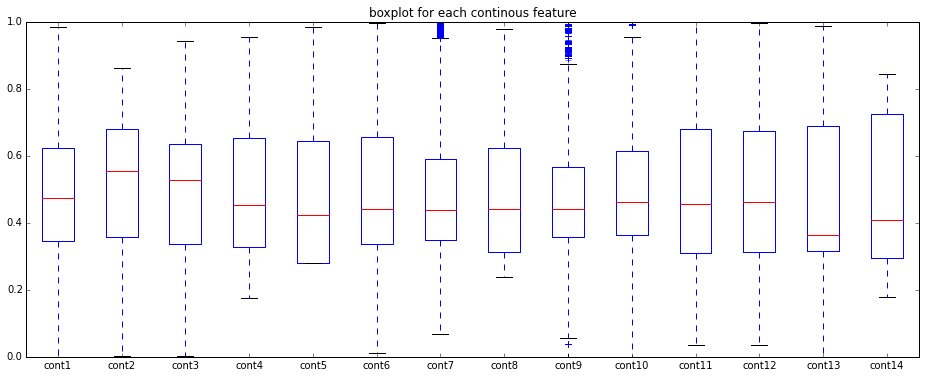

In [5]:
data_cont.plot.box(title = 'boxplot for each continous feature',figsize = (16,6))

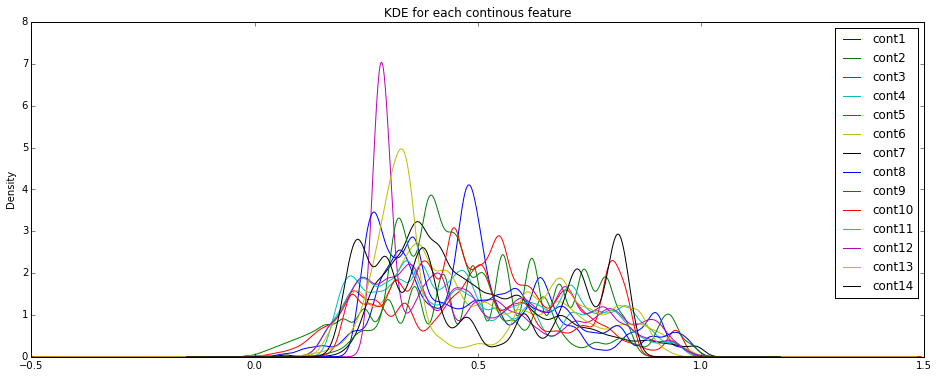

In [6]:
data_cont.plot.kde(title = 'KDE for each continous feature',figsize = (16,6))

In [7]:
data_factorized=data.copy()
test_data_factorized=test_data.copy()
                                 
data_factorized_describe=data_factorized.drop(['id','loss'],1).describe()
test_data_factorized_describe=test_data_factorized.drop('id',1).describe()

diff_mean=pd.DataFrame()
for feat in data_factorized_describe:
    diff_mean[feat]=data_factorized_describe[feat] - test_data_factorized_describe[feat] 
display(diff_mean)


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000
mean,-0.000586,0.000249,0.000664,-0.000522,-0.000212,-0.001244,-0.000975,-0.000964,-0.000509,-0.000843,-0.000849,-0.000882,-0.001948,0.000131
std,-0.000321,0.000365,0.000358,0.000477,-0.000092,-0.000301,-0.000200,-0.000179,-0.000474,-0.000073,-0.000662,-0.000721,-0.000331,-0.000125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001154
25%,-0.001313,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001912,-0.005160,0.000000,0.000000,0.000000,-0.006588,0.000000,-0.000142
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000580,-0.000608,0.000000,0.000000,-0.005530,0.000000,0.000000,0.000000,0.001299
75%,-0.002718,0.000000,0.000000,0.000000,0.000000,-0.004240,-0.000239,-0.005600,-0.002070,-0.005250,0.000000,-0.006654,0.000000,-0.000168
max,0.000000,0.000000,0.000000,-0.001749,0.000567,0.000000,0.000000,-0.002600,0.000000,0.000000,0.000912,0.001068,0.000000,0.000034


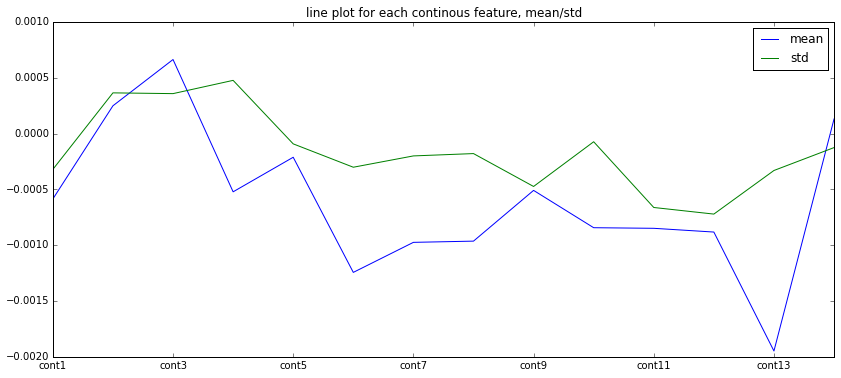

In [8]:

diff_mean.T['mean'].plot(legend = True)
diff_mean.T['std'].plot(legend = True, title = 'line plot for each continous feature, mean/std',figsize=(14,6))
    

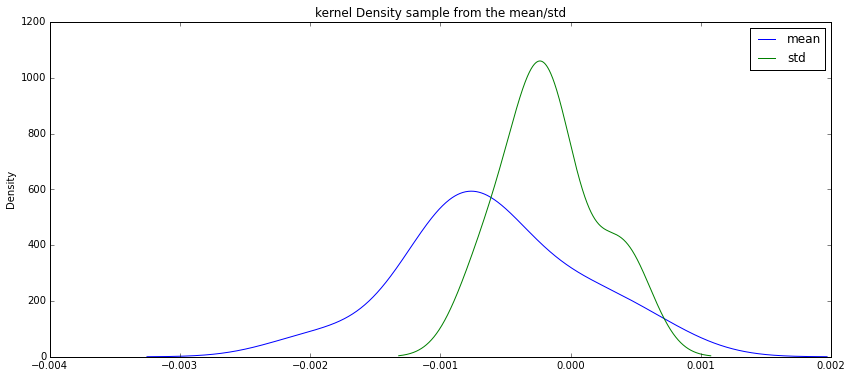

In [9]:
diff_mean.T['mean'].plot(kind='kde',legend = True )
diff_mean.T['std'].plot(kind='kde',legend = True, title = 'kernel Density sample from the mean/std',figsize=(14,6) )


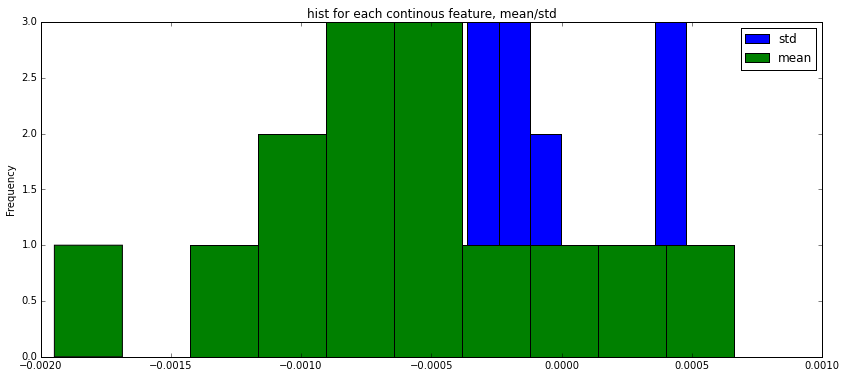

In [10]:
diff_mean.T['std'].plot(legend = True,kind='hist')
diff_mean.T['mean'].plot(kind='hist',legend = True, title = 'hist for each continous feature, mean/std',figsize=(14,6) )


The test and train sets look well matched, with similar avg/std/min/max between test and train

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


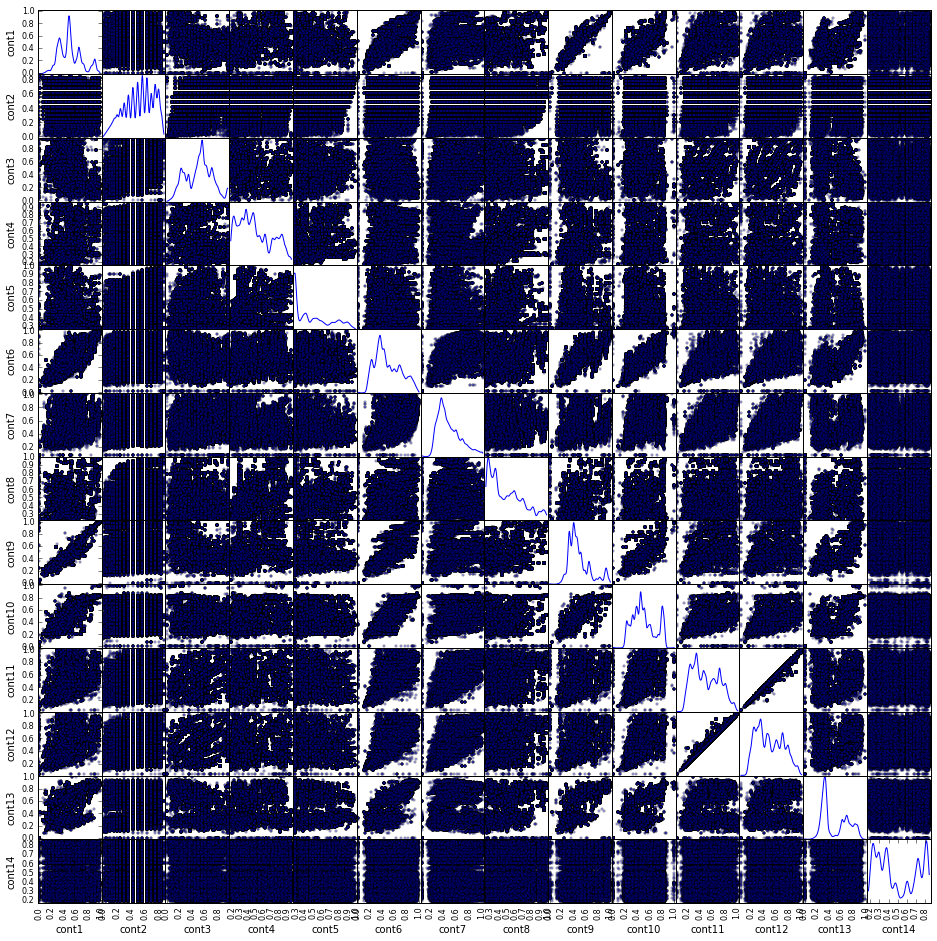

In [12]:
display(data_factorized[conts].describe())
pd.scatter_matrix(data_factorized[conts], alpha = 0.3, figsize = (16,16), diagonal = 'kde');

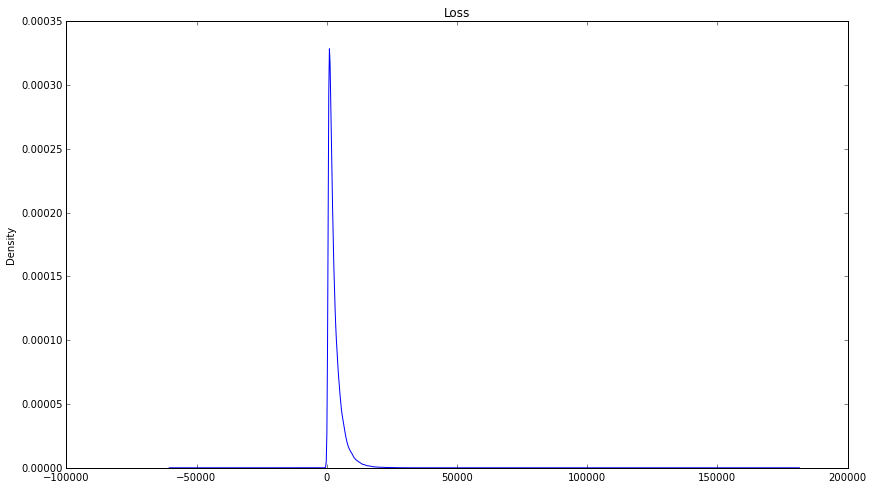

In [12]:
data['loss'].plot(kind='kde',title='Loss',figsize = (14,8))

plt.show()

### Check out the categorical features

In [5]:
data_cats=data[cats ].copy()
display(data_cats.head(3))

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,A,B,A,B,A,A,A,A,B,A,...,J,G,BU,BC,C,AS,S,A,O,LB
1,A,B,A,A,A,A,A,A,B,B,...,K,K,BI,CQ,A,AV,BM,A,O,DP
2,A,B,A,A,B,A,A,A,B,B,...,F,A,AB,DK,A,C,AF,A,I,GK


In [6]:
# hm....are all the values in the test_data seen in the train data?
for c in cats:
    values={}
    for v in data[c]:
        if v in values:
            values[v]+=1
        else:
            values[v]=1
    for v in test_data[c]:
        if v not in values:
            print(c,v,"not found in test!")
# hint...no they are not!

('cat89', 'F', 'not found in test!')
('cat89', 'F', 'not found in test!')
('cat92', 'G', 'not found in test!')
('cat92', 'E', 'not found in test!')
('cat92', 'E', 'not found in test!')
('cat96', 'H', 'not found in test!')
('cat99', 'U', 'not found in test!')
('cat103', 'M', 'not found in test!')
('cat106', 'Q', 'not found in test!')
('cat109', 'AD', 'not found in test!')
('cat109', 'AD', 'not found in test!')
('cat110', 'BH', 'not found in test!')
('cat110', 'CA', 'not found in test!')
('cat110', 'EN', 'not found in test!')
('cat111', 'L', 'not found in test!')
('cat113', 'AA', 'not found in test!')
('cat113', 'R', 'not found in test!')
('cat116', 'AQ', 'not found in test!')
('cat116', 'EM', 'not found in test!')
('cat116', 'FY', 'not found in test!')
('cat116', 'AI', 'not found in test!')
('cat116', 'N', 'not found in test!')
('cat116', 'ET', 'not found in test!')
('cat116', 'KO', 'not found in test!')
('cat116', 'BJ', 'not found in test!')
('cat116', 'IW', 'not found in test!')
('cat

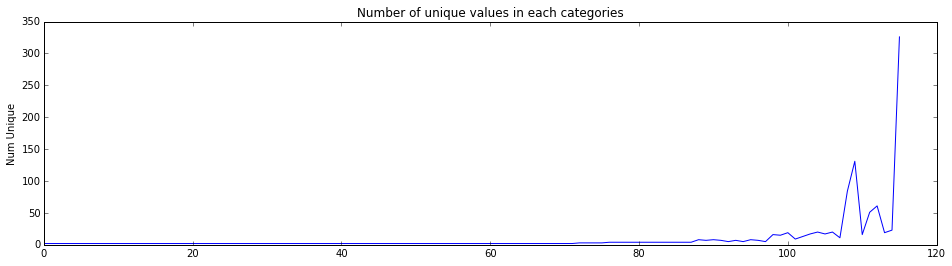

In [15]:
#data_cats.plot.box(title = 'boxplot for each continous feature',figsize = (16,6))

#data_cats.plot(kind='stripplot',legend = True, title = 'hist for each categorical feature, mean/std',figsize=(14,6) )

cats_num_unique=[]
for cat in data_cats:
    cats_num_unique.append(len(data_cats[cat].unique()))

plt.figure(figsize=(16,4))
plt.plot(cats_num_unique)
#plt.xticks(range(len(cats)), cats)
plt.ylabel('Num Unique')
plt.title('Number of unique values in each categories  ')
plt.show()

It appears many of the categoricals are binary, or limited to a small number of answers, while a portion have many possible answers

E    76493
F    62892
G    20613
D    12172
H    11258
I     2941
J      694
K      486
C      275
M      171
L      145
A       77
N       64
P       15
O        9
B        5
Q        4
R        2
S        1
T        1
Name: cat105, dtype: int64


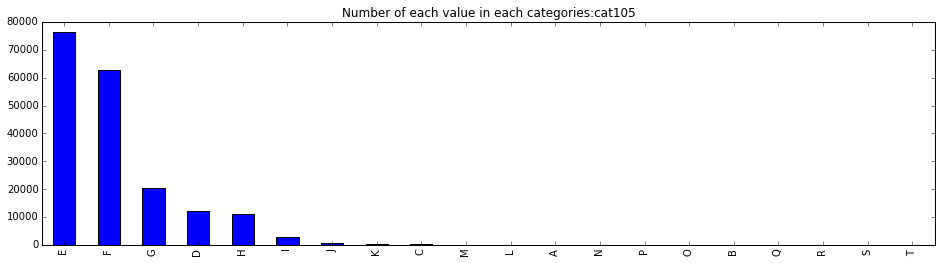

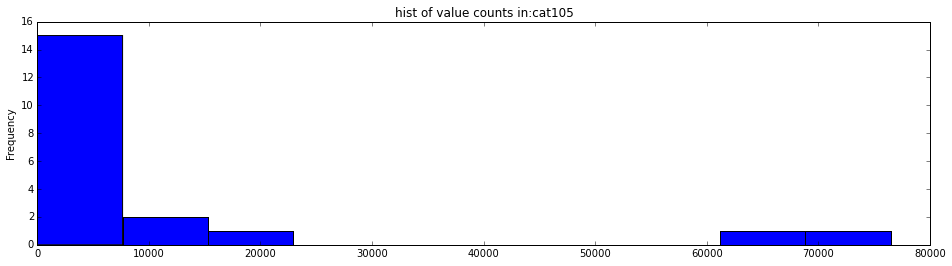

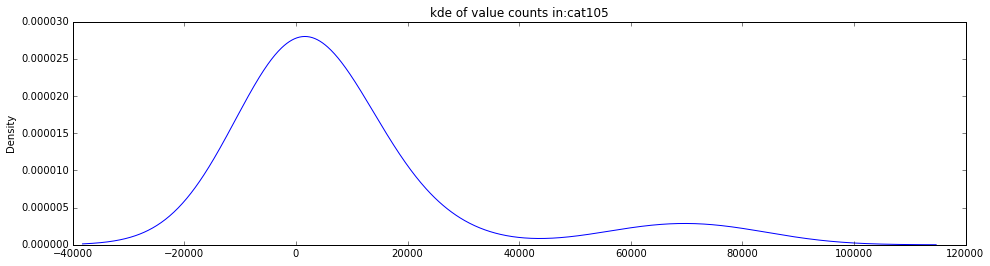

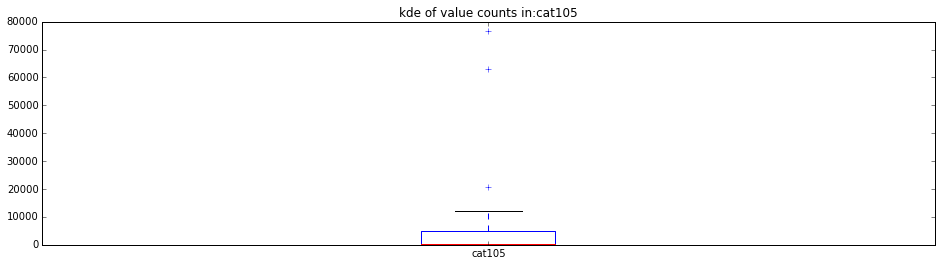

F    47310
G    28560
H    23461
J    22405
K    20236
I    20066
E    12521
L     6976
D     3225
M     2067
N      797
C      213
Q      140
O      125
P      100
A       75
U       32
R        5
B        2
S        2
Name: cat107, dtype: int64


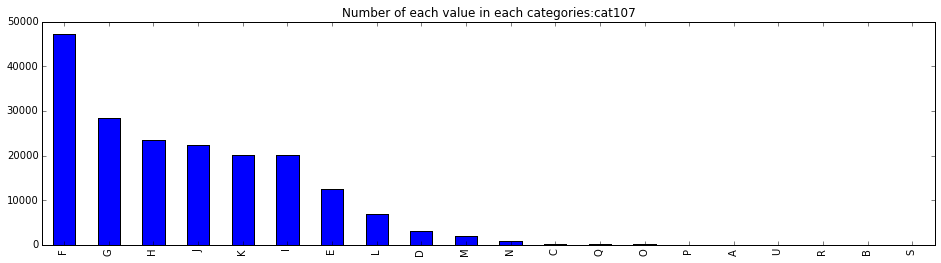

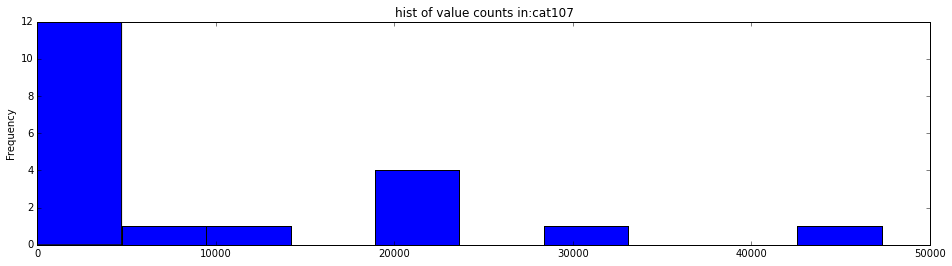

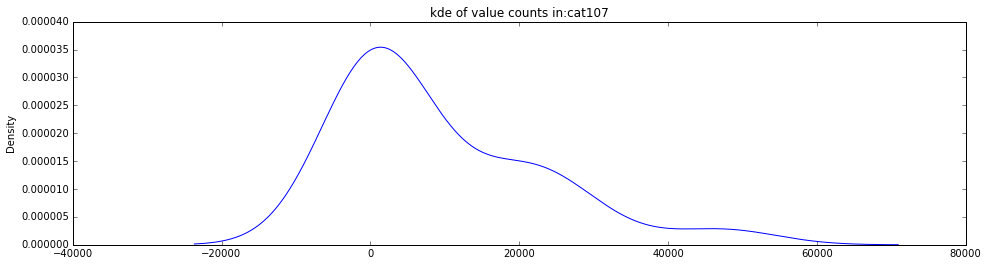

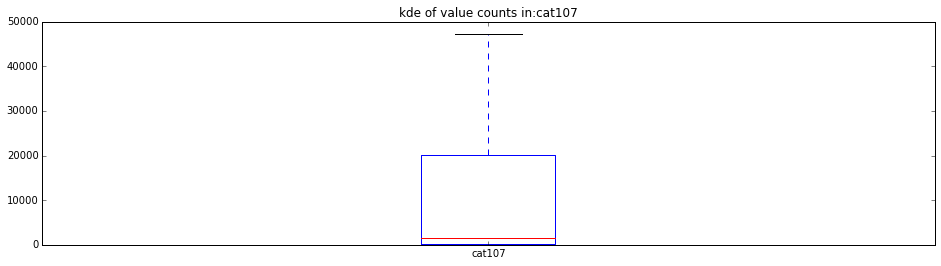

BI    152918
AB     21933
BU      3142
K       2999
G       1353
BQ      1067
N        461
M        446
BO       329
BH       257
D        214
AR       208
AT       200
CL       178
AS       159
AL       151
R        149
CD       143
F        124
BL       122
CI       109
I         94
L         89
U         78
AW        74
H         73
Q         66
CA        66
BX        61
T         59
       ...  
BC        14
CK        13
CF        12
V         11
BS         9
AY         9
CE         8
AF         8
CG         8
P          8
CJ         8
AP         7
CH         6
AV         6
BE         5
BY         3
BG         3
BM         2
AO         2
BT         2
BV         2
BN         2
J          1
CB         1
BF         1
B          1
AG         1
AK         1
ZZ         1
BP         1
Name: cat109, dtype: int64


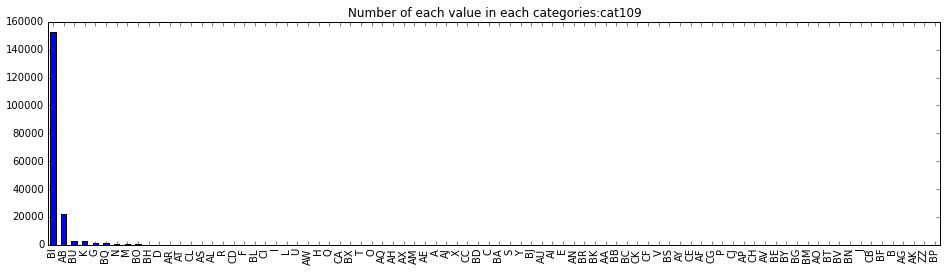

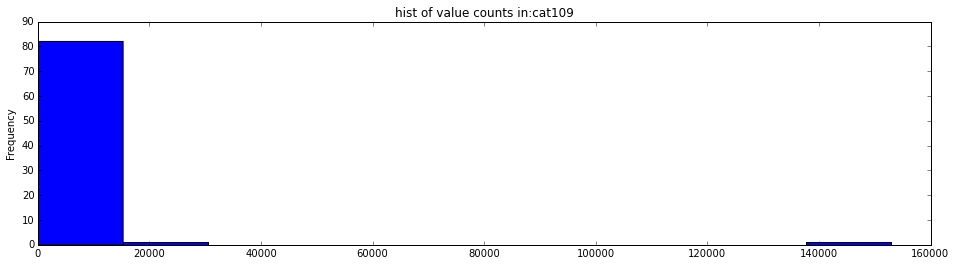

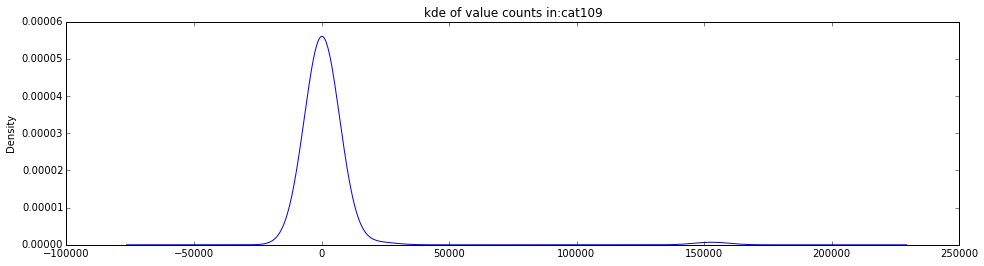

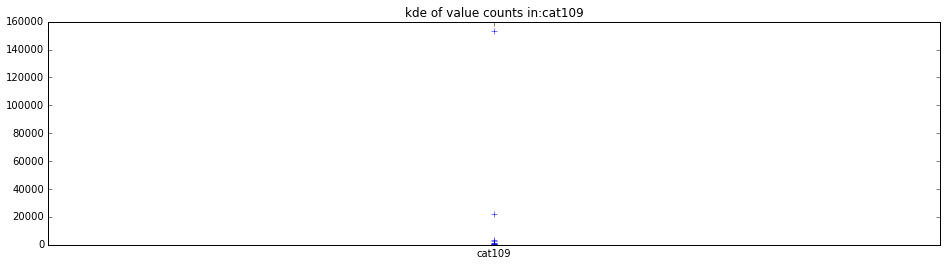

CL    25305
EG    24654
CS    24592
EB    21396
CO    17495
BT    16365
EL     9236
BC     4131
DW     3640
CQ     3271
DX     3096
AI     2965
BP     2867
W      2703
C      2681
AC     2611
CM     1925
BS     1920
DK     1745
V      1692
A      1296
EE     1185
EF     1159
CI     1066
DM      796
CR      767
AM      643
AD      626
AP      576
T       529
      ...  
BY        8
CW        8
H         8
AG        7
CX        6
BB        6
DB        4
EK        4
BU        4
AH        4
DD        3
Q         3
DT        3
AN        3
AF        3
EI        2
DN        2
CU        2
EJ        2
BN        2
BV        2
BK        1
EH        1
AS        1
CB        1
BD        1
BM        1
DV        1
BI        1
S         1
Name: cat110, dtype: int64


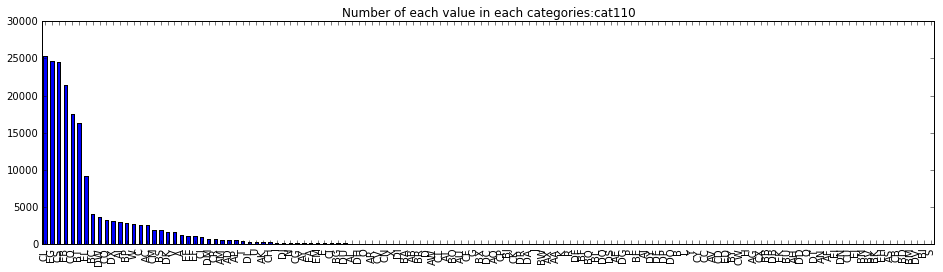

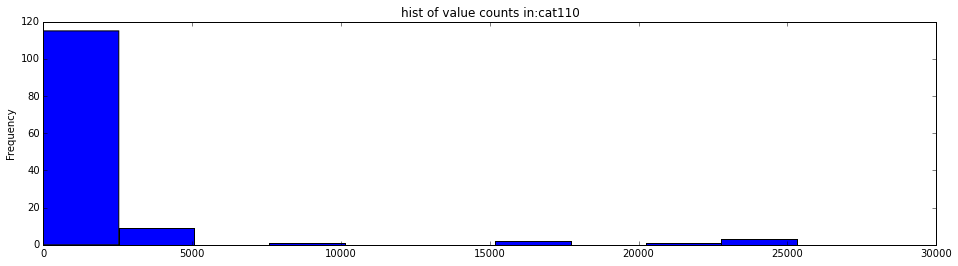

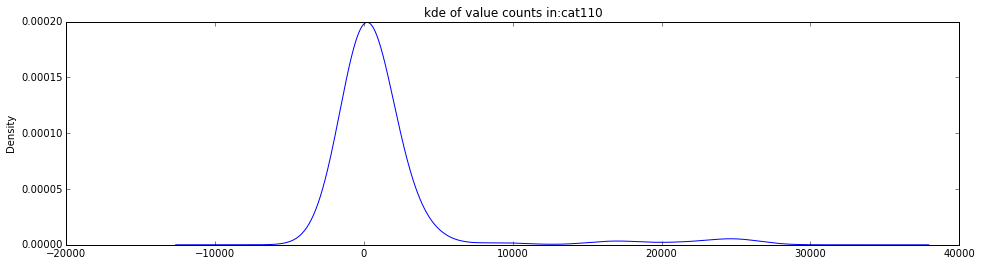

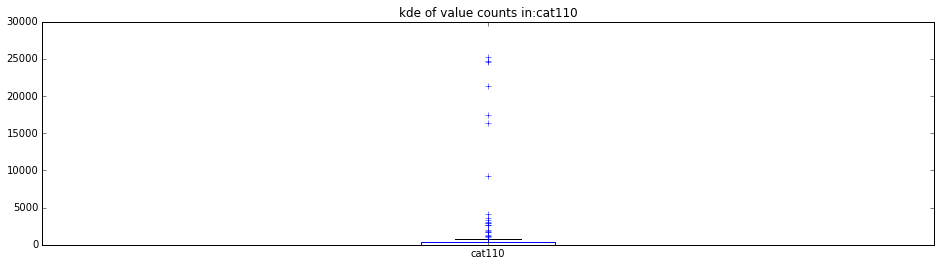

E     25148
AH    18639
AS    17669
J     16222
AF     9368
AN     9138
N      8453
U      8356
AV     7122
AK     6726
K      6059
AI     4749
S      4201
AP     4000
G      3168
F      3149
AW     3145
A      2411
AR     2365
C      2257
O      2183
D      1645
AD     1531
AY     1414
Y      1351
AG     1331
AT     1272
AA     1241
AM     1170
AL     1130
R      1123
AX     1074
I       940
X       925
AE      834
Q       793
V       693
H       548
AO      534
T       521
L       493
W       461
AC      454
M       439
AU      434
B       423
P       406
AB      246
BA      190
AJ      144
AQ       30
Name: cat112, dtype: int64


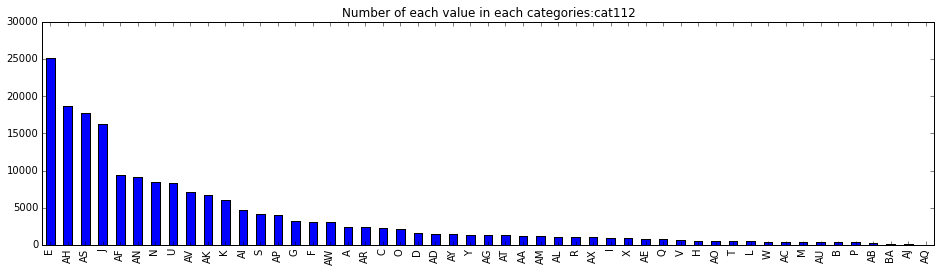

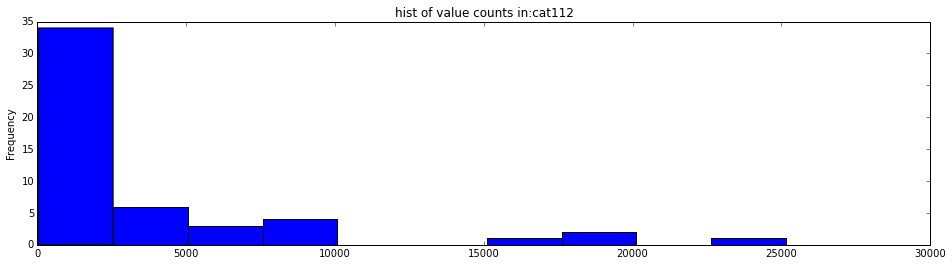

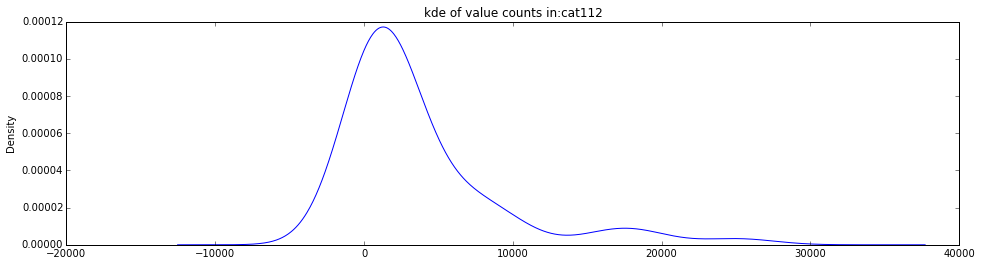

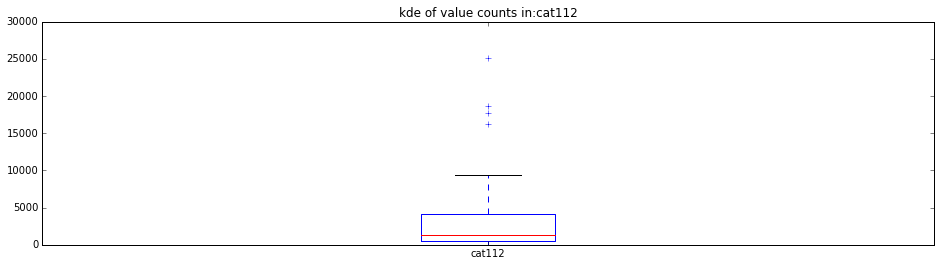

BM    26191
AE    22030
L     13058
AX    12661
Y     11374
K      7738
S      7033
X      7016
AF     6079
AN     5214
H      5094
AT     4664
AJ     4425
AD     4419
AS     3901
AK     3520
BN     3486
I      3279
A      3269
J      3105
N      2839
BC     2793
Q      2784
BJ     2605
M      2485
AG     2415
AW     1825
BG     1804
AU     1630
AO     1628
      ...  
BO     1413
BH     1221
BK      693
AV      528
AY      466
AM      450
AI      440
BF      347
BD      337
AH      209
C       143
BB       53
BA       42
BI       32
G        18
AB       18
AQ       17
V        15
U        11
O        10
E         7
AP        6
BL        3
BE        3
AL        3
T         2
B         1
AC        1
P         1
AR        1
Name: cat113, dtype: int64


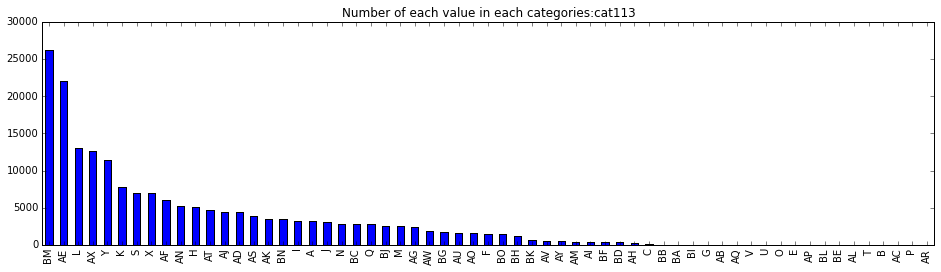

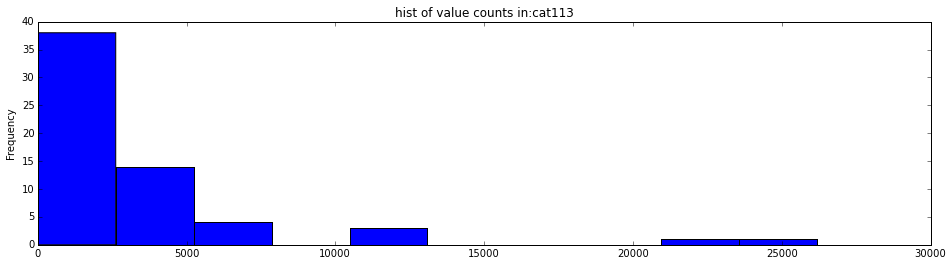

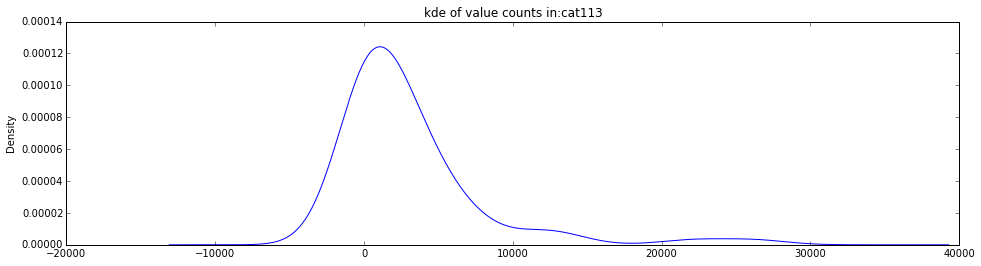

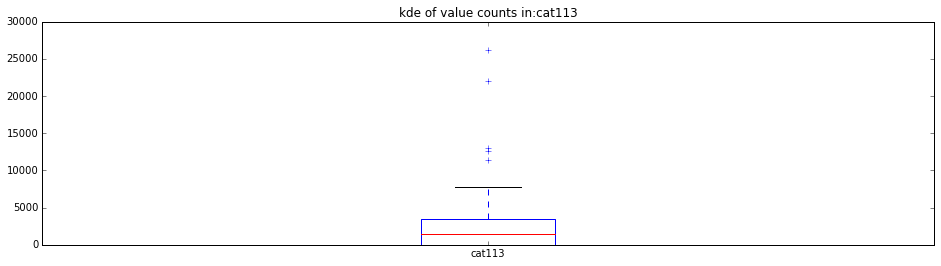

K    43866
O    26813
J    23895
N    22438
P    21538
L    16125
M    12444
Q     8258
I     7090
H     2793
R     2038
G      315
F      269
S      250
A       75
T       56
U       26
E       11
W        6
X        5
D        4
B        2
C        1
Name: cat115, dtype: int64


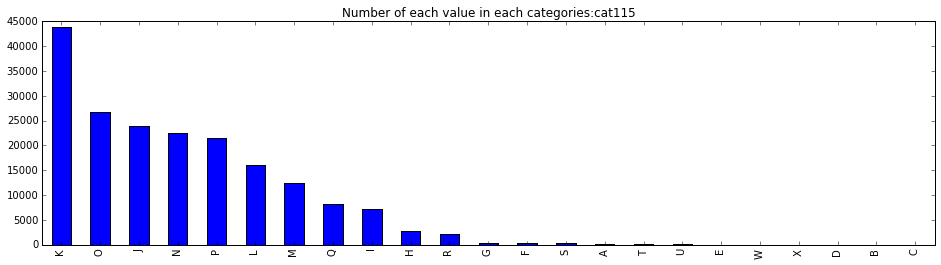

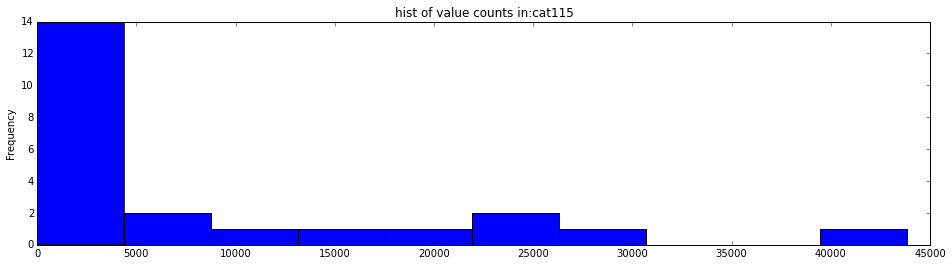

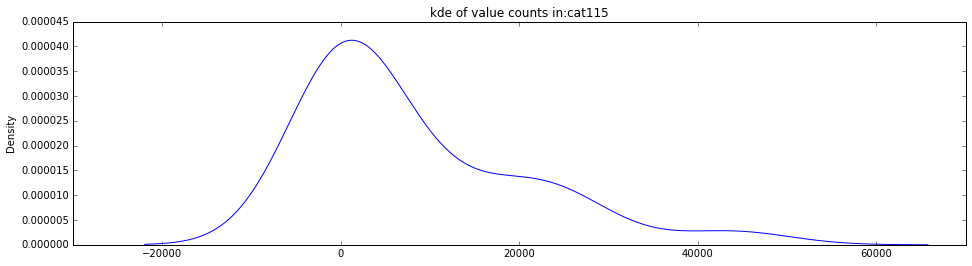

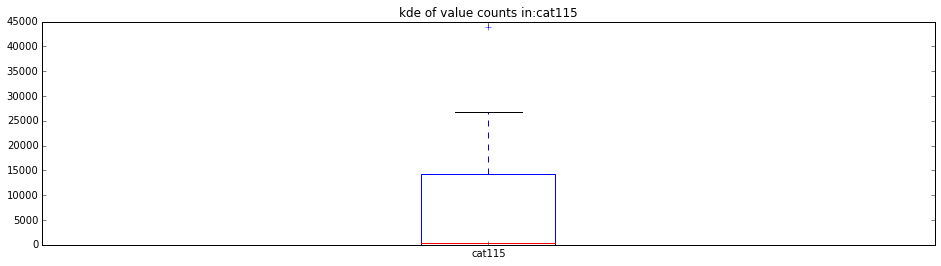

HK    21061
DJ    20244
CK    10162
DP     9202
GS     8736
CR     6862
HX     5629
DC     4557
HG     4414
IE     4225
HQ     4044
HV     3853
GC     3803
LM     3277
LB     3194
LN     3127
KW     3085
HJ     2741
GK     2632
DF     2519
IG     2269
LO     2082
HB     2007
MD     1960
CB     1909
LF     1873
GI     1835
BY     1620
KC     1513
GE     1399
      ...  
FS        1
C         1
IX        1
MF        1
JD        1
J         1
HU        1
AE        1
AD        1
HO        1
AH        1
AM        1
DY        1
MS        1
JO        1
AN        1
AP        1
AS        1
MT        1
AR        1
DQ        1
MH        1
JI        1
AT        1
G         1
FO        1
FN        1
MB        1
JK        1
IB        1
Name: cat116, dtype: int64


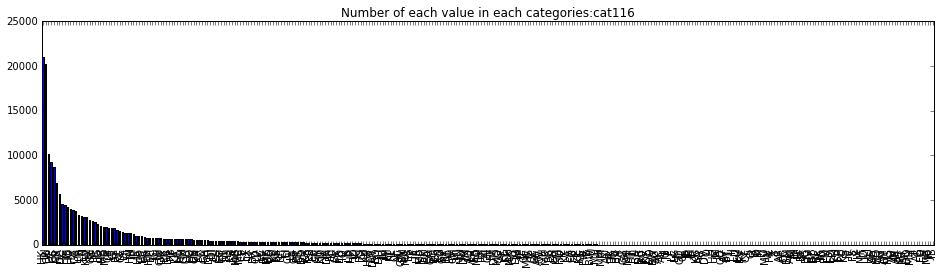

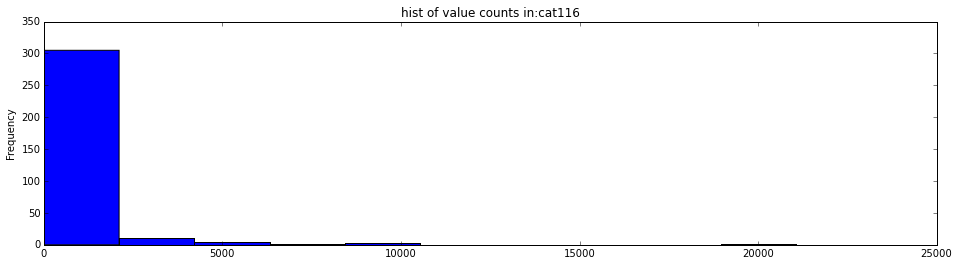

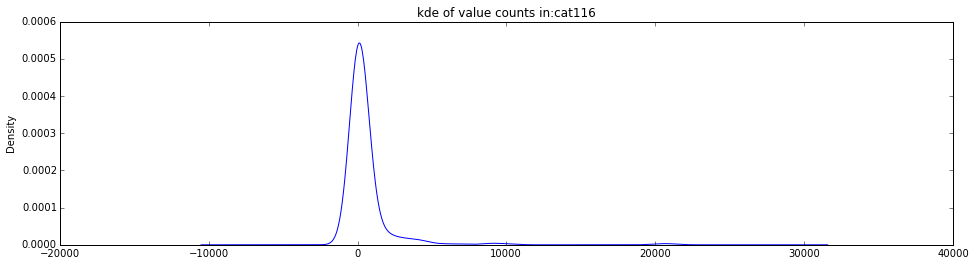

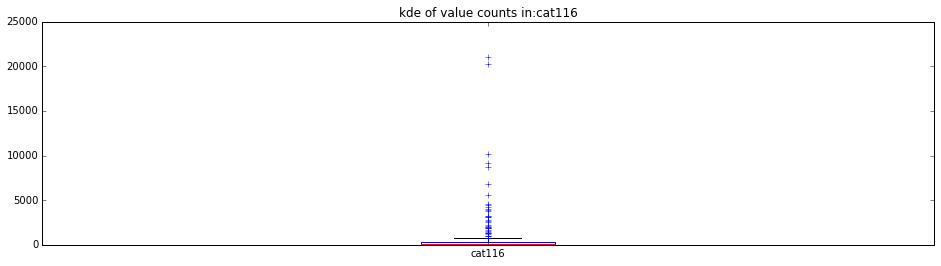

In [54]:
for cat in data_cats:
    cat_max= data_cats[cat].value_counts().max()
    cat_min= data_cats[cat].value_counts().min()
    cat_std= data_cats[cat].value_counts().std()
    #print "for {}: size:{} max:{} min:{}, std:{}, ".format(cat,len(data_cats[cat].value_counts()),cat_max,cat_min,cat_std)
    if len(data_cats[cat].value_counts())>=20:
        print data_cats[cat].value_counts()
        plt.figure(figsize=(16,4))
        data_cats[cat].value_counts().plot(kind='bar') 
        #plt.ylabel('Num per category')
        plt.title('Number of each value in each categories:'+cat)
        plt.show()
        
        plt.figure(figsize=(16,4))
        data_cats[cat].value_counts().plot(kind='hist') 
        #plt.ylabel('Num per category')
        plt.title('hist of value counts in:'+cat)
        plt.show()
        
        plt.figure(figsize=(16,4))
        data_cats[cat].value_counts().plot(kind='kde') 
        #plt.ylabel('Num per category')
        plt.title('kde of value counts in:'+cat)
        plt.show()
        
        plt.figure(figsize=(16,4))
        data_cats[cat].T.value_counts().plot(kind='box') 
        #plt.ylabel('Num per category')
        plt.title('kde of value counts in:'+cat)
        plt.show()

### EOF